In [30]:
# 1.Task 1: Dataset Selection 
# a.Choose two datasets from the provided repositories. 
# Answer: I have chosen the following two datasets from the provided repositories:
# Dataset 1: Titanic Dataset
# Dataset 2: College Scoreboard Data


# b.Justify your selection for each dataset based on its relevance to machine learning tasks. Include a brief paragraph explaining the dataset's potential for analysis and its suitability for machine learning applications.
# Answer: Dataset 1: Titanic Dataset
# Justification: A well-known and durable dataset that is frequently used in data science and machine learning is the Titanic dataset. 
#                It provides details on those who travelled on the RMS Titanic during its fatal first voyage, including whether or not they survived. 
#                The dataset can be utilized for machine learning applications since it combines categorical and numerical data that can be used to train a machine learning model that will be able to predict a passenger's survival based on their attributes.
# Dataset 2: College Scoreboard Data
# Justification: The College Scorecard offers data by field of study as well as data at the institution level. 
#                In-depth details concerning these data are provided in the technical data publications. 
#                The data dictionary has distinct worksheets with institution-level, field-of-study, and group maps outlining the timing characteristics of each data element.

In [ ]:
# 2.Task 2: Data Exploration with Python 
# a.Perform exploratory data analysis (EDA) using Python for the first dataset. 
# b.Generate summary statistics, identify data types, and visualize the data distribution to gain insights into the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset into a DataFrame
df = pd.read_csv('C:/Users/Drasti/source/repos/Drashti(8890040)_Assignment_10/titanic.csv',encoding='ISO-8859-1')

In [4]:
print("Preview of the dataset:")
print(df.head())

Preview of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

In [5]:
print("\nDataset Information")
print(df.info())


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# Summary statistics
print("\nSummary Statistics")
print(df.describe())


Summary Statistics
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  



Histograms:


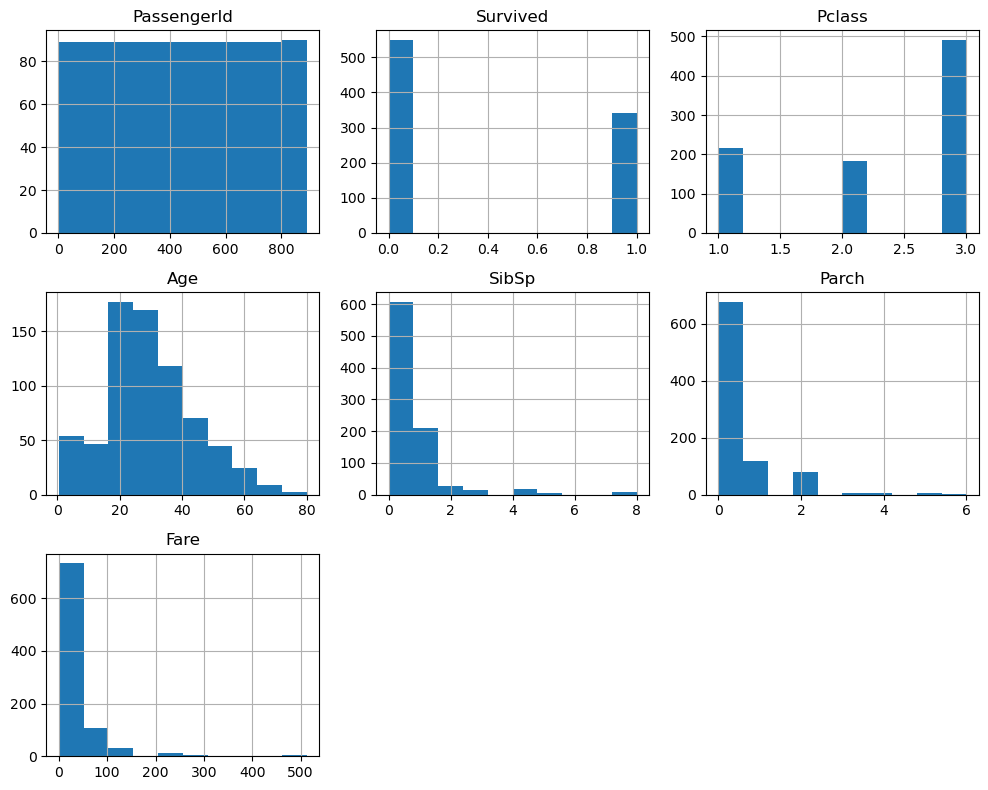

In [7]:
# Visualize data distribution
print("\nHistograms:")
df.hist(figsize=(10,8))
plt.title("Histogram")
plt.tight_layout()
plt.show()

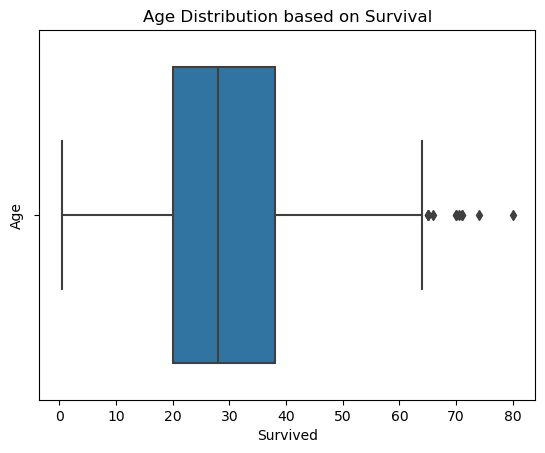

In [8]:
sns.boxplot(x='Age', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age Distribution based on Survival')
plt.show()


In [ ]:
# 3.Task 3: Data Preprocessing with Python 
# a.Preprocess the data from the first dataset using Python. 
# b.Handle missing values, outliers, and perform feature engineering when necessary to prepare the data for machine learning models.

In [9]:
# Handling missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Handling outliers
df = df[df['Age'] < 60]  # Remove outliers where age is greater than 60

In [11]:
# Feature engineering
df['age_squared'] = df['Age'] ** 2  # Add new feature: age_squared

In [12]:
df.drop(['Cabin','Name','Ticket','PassengerId'], axis =1, inplace = True) 
print(df.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  age_squared
0         0       3    male  22.0      1      0   7.2500        S        484.0
1         1       1  female  38.0      1      0  71.2833        C       1444.0
2         1       3  female  26.0      0      0   7.9250        S        676.0
3         1       1  female  35.0      1      0  53.1000        S       1225.0
4         0       3    male  35.0      0      0   8.0500        S       1225.0


In [13]:
df['Sex']=pd.factorize(df['Sex'])[0]
df['Embarked']=pd.factorize(df['Embarked'])[0]


In [ ]:
# 4.Task 4: Implement Machine Learning Models with Python 
# a.Implement at least two different machine learning models (e.g., SVM, Random Forest, Neural Network) for the first dataset using Python. 
# b.Evaluate and compare the performance of each model using appropriate metrics to determine the most suitable model for the dataset.

In [31]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [19]:
svm_model = SVC(kernel='linear', random_state=40)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
SVMAccuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM: {SVMAccuracy:.2f}')
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


Accuracy of SVM: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        78
           1       0.80      0.67      0.73        60

    accuracy                           0.78       138
   macro avg       0.79      0.77      0.77       138
weighted avg       0.78      0.78      0.78       138



In [20]:
random_forest_model = RandomForestClassifier(random_state=1)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)
RandomAccuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest: {RandomAccuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy of Random Forest: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        78
           1       0.80      0.73      0.77        60

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.80      0.80      0.80       138



In [ ]:
# 5.Task 5: Visualization with Python 
# a.Create meaningful visualizations (e.g., scatter plots, heatmaps, bar charts) for the first dataset using Python. 
# b.Use libraries like Matplotlib, Seaborn, or Plotly to create clear and insightful visual representations of the dataset.



Correlation Heatmap


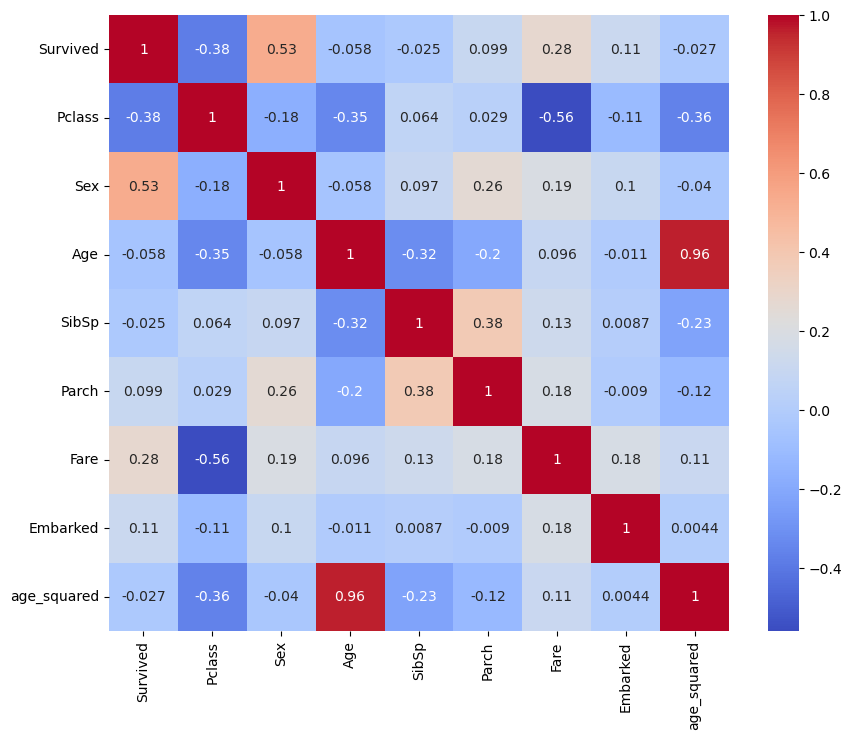

In [23]:
print("\nCorrelation Heatmap")
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.show()

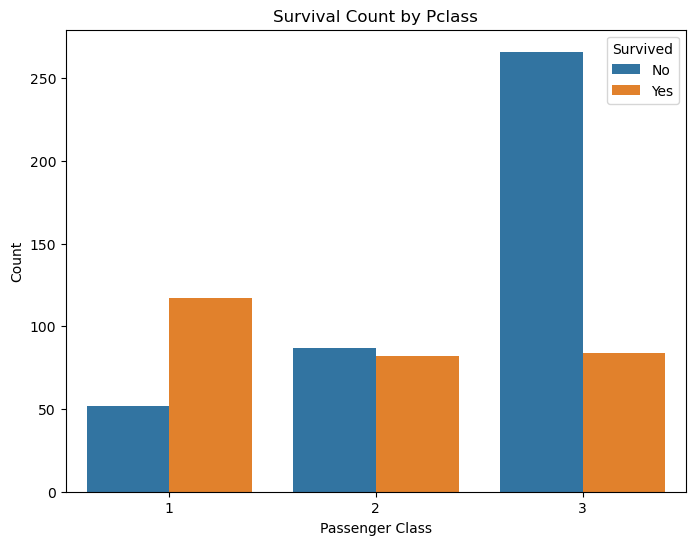

In [24]:
# Visualization : Survival Count based on Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

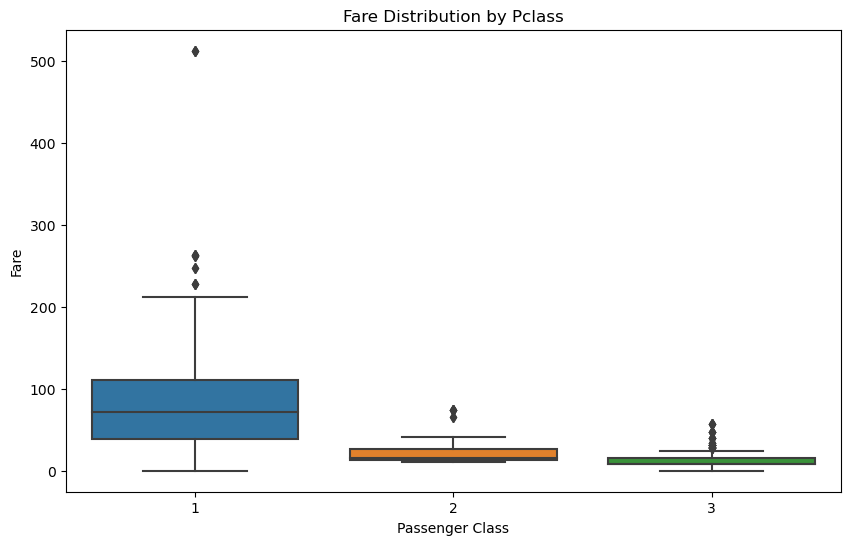

In [26]:
# Visualization: Box plot of Age based on Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

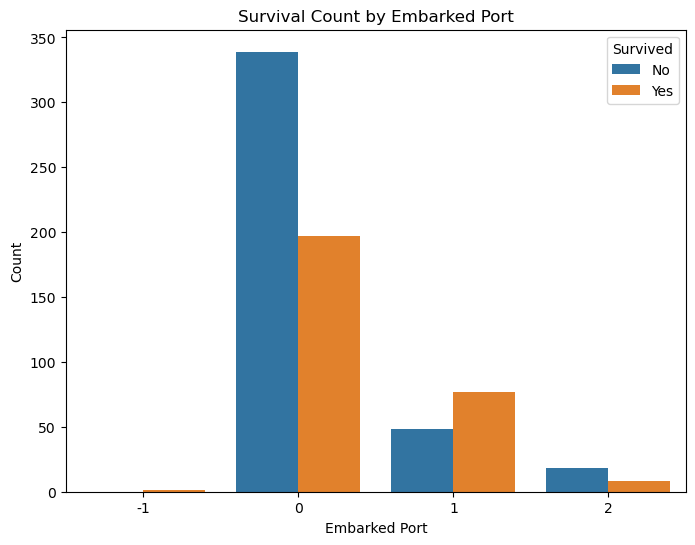

In [27]:
# Visualization: Bar chart of Survival Count
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


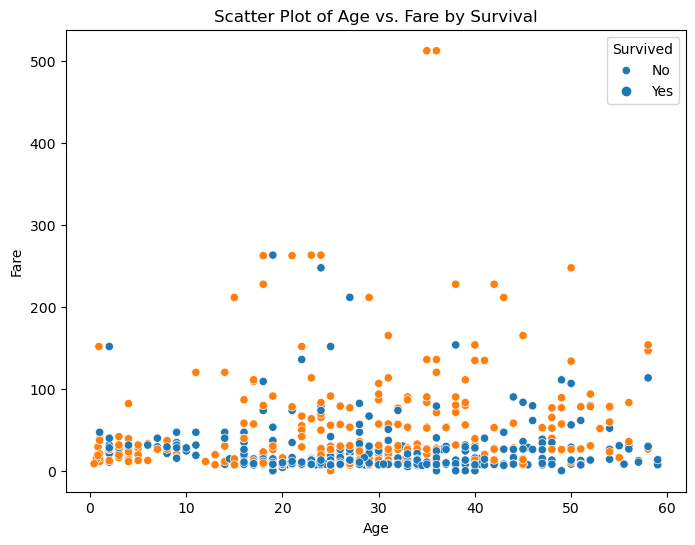

In [29]:
# Visualization : Scatter plot of Survival Count
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Scatter Plot of Age vs. Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()